In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
import seaborn as sns



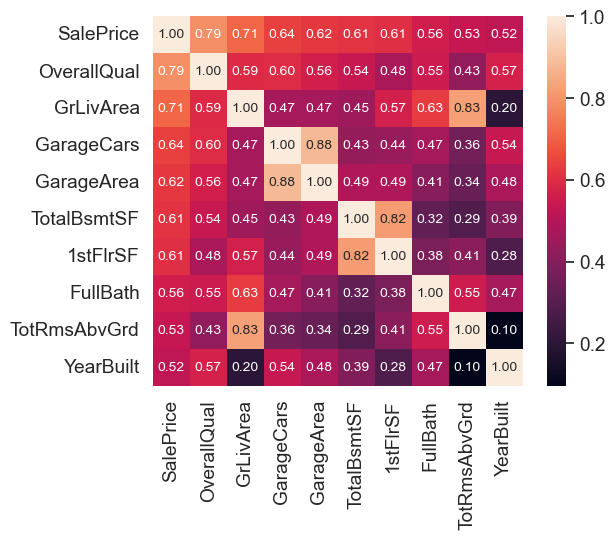

In [2]:
corrmat = train_df.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


              SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.790982   0.708624    0.640409    0.623431   
OverallQual    0.790982     1.000000   0.593007    0.600671    0.562022   
GrLivArea      0.708624     0.593007   1.000000    0.467247    0.468997   
GarageCars     0.640409     0.600671   0.467247    1.000000    0.882475   
GarageArea     0.623431     0.562022   0.468997    0.882475    1.000000   
TotalBsmtSF    0.613581     0.537808   0.454868    0.434585    0.486665   
1stFlrSF       0.605852     0.476224   0.566024    0.439317    0.489782   
FullBath       0.560664     0.550600   0.630012    0.469672    0.405656   
TotRmsAbvGrd   0.533723     0.427452   0.825489    0.362289    0.337822   
YearBuilt      0.522897     0.572323   0.199010    0.537850    0.478954   

              TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  
SalePrice        0.613581  0.605852  0.560664      0.533723   0.522897  
OverallQual      0.537808  0

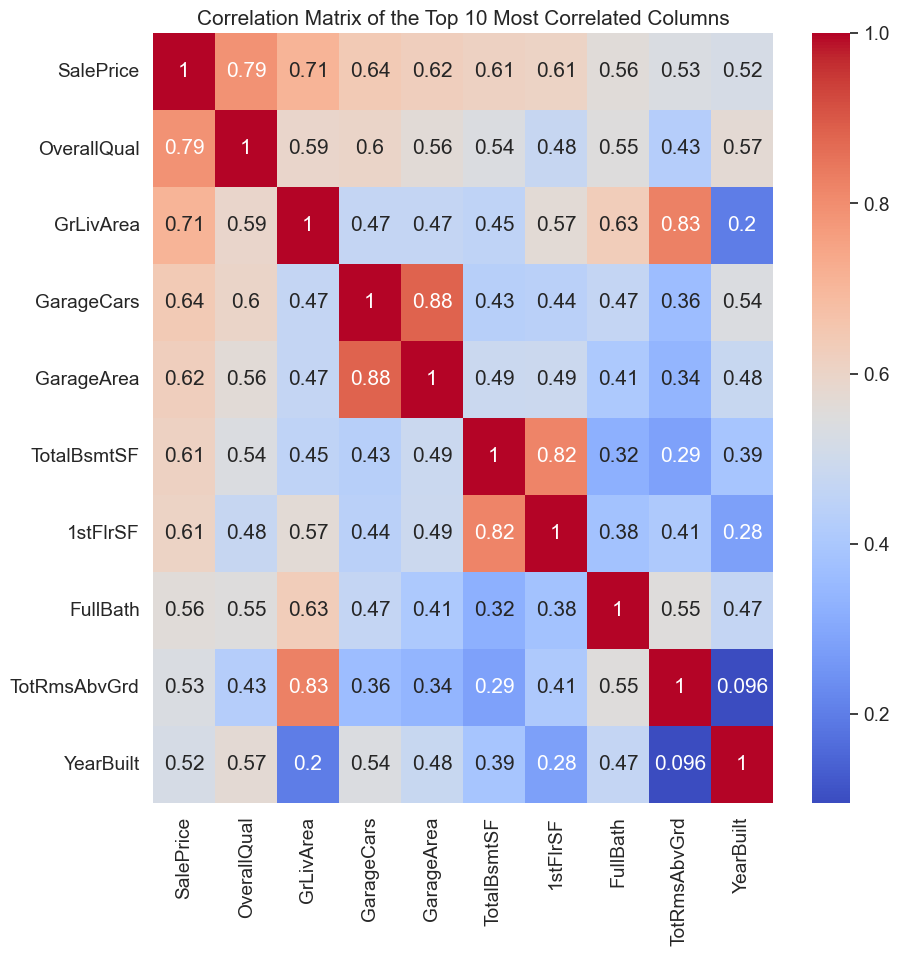

In [3]:
corr_matrix = train_df.corr()
top_cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = train_df[top_cols].corr()

print(top_corr_matrix)
corr_matrix = train_df.corr()

# Select the top ten most correlated columns
top_cols = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = train_df[top_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of the Top 10 Most Correlated Columns')
plt.show()

/Users/abdulfattah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


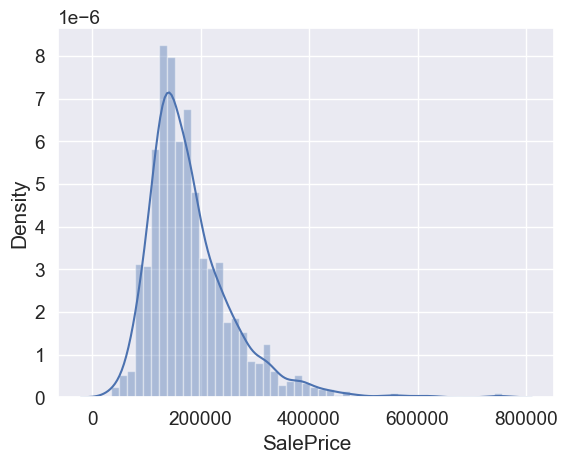

In [4]:
sns.distplot(train_df['SalePrice'])
plt.show()

In [5]:
def remove_outliers(df, col, k):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - k*iqr
    fence_high = q3 + k*iqr
    df = df.loc[(df[col] > fence_low) & (df[col] < fence_high)]
    return df

train_df = remove_outliers(train_df, 'GrLivArea', 1.5)


In [6]:
train_df = train_df.drop(["Id", "Utilities"], axis=1)
idlist = test_df["Id"]
test_df = test_df.drop(["Id", "Utilities"], axis=1)


In [7]:
idlist

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [8]:
# Convert categorical variables to binary variables using one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align train and test sets after one-hot encoding
train_df, test_df = train_df.align(test_df, join='outer', axis=1, fill_value=0)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df.drop(["SalePrice"], axis=1), train_df["SalePrice"], test_size=0.2)


In [10]:
# Import machine learning models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Instantiate machine learning models
knn = KNeighborsRegressor()
lr = LinearRegression()
rf = RandomForestRegressor()
svm = SVR()


X_train = X_train.fillna(X_train.median())
X_train = X_train.replace([np.inf, -np.inf], np.nan)
# Train machine learning models
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVR()

In [11]:
print(X_train.isnull().sum())
X_train

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley_Grvl      0
Alley_Pave      0
               ..
TotalBsmtSF     0
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
Length: 284, dtype: int64


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,SaleType_WD,ScreenPorch,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
351,1453,0,0,0,0,2,1,0,0,0,...,1,184,0,1,6,1453,0,1986,1986,2006
347,1478,0,0,0,0,3,1,0,0,0,...,1,0,0,1,6,1478,0,1960,1960,2009
956,561,668,0,0,0,2,0,0,0,0,...,1,0,0,1,5,561,150,1980,1980,2009
187,808,704,140,0,0,3,1,0,0,0,...,1,0,0,1,8,660,0,1916,1987,2009
625,1116,0,0,0,0,3,1,0,0,0,...,1,385,0,1,5,1116,0,1962,1962,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1072,0,0,0,0,2,0,0,0,0,...,0,0,0,1,5,547,0,2005,2006,2006
920,936,785,0,0,0,3,1,0,0,0,...,1,0,0,1,7,928,300,1994,1994,2007
1261,1050,0,0,0,0,2,1,0,0,0,...,1,0,0,1,5,1050,0,1956,1956,2009
825,2084,0,0,0,0,2,1,0,0,0,...,0,0,0,1,7,2078,188,2007,2008,2008


In [12]:
X_train.shape


(1143, 284)

In [13]:
knn = KNeighborsRegressor()
lr = LinearRegression()
rf = RandomForestRegressor()
svm = SVR()

# Train machine learning models
knn.fit(X_train, y_train)
lr.fit(X_train, y_train)

rf.fit(X_train, y_train)
svm.fit(X_train, y_train)




SVR()

In [14]:
from sklearn.metrics import mean_absolute_error
# Fill NaN values in X_val
X_val = X_val.fillna(X_train.median())
print(X_val.info)
# Generate predictions on validation set
knn_preds = knn.predict(X_val)
lr_preds = lr.predict(X_val)
rf_preds = rf.predict(X_val)
svm_preds = svm.predict(X_val)

# Compute MAE on validation set
knn_mae = mean_absolute_error(y_val, knn_preds)
lr_mae = mean_absolute_error(y_val, lr_preds)
rf_mae = mean_absolute_error(y_val, rf_preds)
svm_mae = mean_absolute_error(y_val, svm_preds)

print("KNN MAE:", knn_mae)
print("LR MAE:", lr_mae)
print("RF MAE:", rf_mae)
print("SVM MAE:", svm_mae)


<bound method DataFrame.info of       1stFlrSF  2ndFlrSF  3SsnPorch  Alley_Grvl  Alley_Pave  BedroomAbvGr  \
978        894         0          0           0           0             3   
1357      1078         0          0           0           0             3   
212        932       920          0           0           0             3   
206       1696         0          0           0           0             3   
681        848       672          0           0           1             3   
...        ...       ...        ...         ...         ...           ...   
1342      1284       885          0           0           0             3   
638        796         0          0           0           0             2   
1178       820       523          0           0           0             3   
792       1127       886          0           0           0             3   
79         682       548          0           1           0             2   

      BldgType_1Fam  BldgType_2fmCon  BldgT

In [15]:
processedTest_df = test_df

In [16]:
test_features = list(processedTest_df.columns)
test_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley_Grvl',
 'Alley_Pave',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm'

In [17]:
X_train.shape
processedTest_df.shape

(1459, 285)

In [18]:
train_features = list(X_train.columns) 
train_features

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley_Grvl',
 'Alley_Pave',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm'

In [19]:
set_dif = set(train_features).symmetric_difference(set(test_features))
temp3 = list(set_dif)
print(temp3)


['SalePrice']


In [20]:
processedTest_df = processedTest_df.fillna(processedTest_df.median())


In [21]:
processedTest_df = processedTest_df.drop(columns = ["SalePrice"])

In [22]:
processedTest_df.shape

(1459, 284)

In [23]:
test_preds = rf.predict(processedTest_df)

In [24]:
processedTest_df.shape

(1459, 284)

In [25]:

# Preprocess the test set

#preprocessed_test_data = preprocess_data(test_df)

# Fill NaN values in test set
#preprocessed_test_data = preprocessed_test_data.fillna(preprocessed_data.median())
#processedTest_df = test_df.fillna(test_df.median())

# Generate predictions on the test set using the K-Nearest Neighbors regressor
test_preds = rf.predict(processedTest_df)



In [26]:
test_df.shape
test_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley_Grvl', 'Alley_Pave',
       'BedroomAbvGr', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs',
       ...
       'SaleType_WD', 'ScreenPorch', 'Street_Grvl', 'Street_Pave',
       'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object', length=285)

In [27]:
# Create a submission dataframe
submission = pd.DataFrame({'Id': idlist, 'SalePrice': test_preds})

# Save the submission dataframe to a CSV file
submission.to_csv('submission_latest.csv', index=False)

In [28]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 978 to 79
Columns: 284 entries, 1stFlrSF to YrSold
dtypes: float64(3), int64(35), uint8(246)
memory usage: 155.8 KB


In [29]:
score = 0.14992
rounded_score = round(score,3)
print(rounded_score)

0.15
